<a href="https://colab.research.google.com/github/girinath18/streamlit-example/blob/master/Updated%20text%20to%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet --upgrade diffusers transformers accelerate invisible_watermark mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 51.8 MB/s eta 0:00:00


In [2]:
!pip install --upgrade diffusers


In [3]:
use_refiner = False
use_latent_consistency = True

In [4]:
import mediapy as media
import random
import sys
import torch

from diffusers import StableDiffusionXLPipeline, UNet2DConditionModel, EulerDiscreteScheduler
from huggingface_hub import hf_hub_download
from safetensors.torch import load_file

# Pick:
# -    2, 4 or 8 steps for lora,
# - 1, 2, 4 or 8 steps for unet.
num_inference_steps = 4

# Prefer "unet" over "lora" for quality.
use_lora = False
model_type = "lora" if use_lora else "unet"

base = "stabilityai/stable-diffusion-xl-base-1.0"
repo = "ByteDance/SDXL-Lightning"
ckpt = f"sdxl_lightning_{num_inference_steps}step_{model_type}.safetensors"
device = "cuda"

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [5]:
unet = UNet2DConditionModel.from_config(
    base,
    subfolder="unet",
    ).to(device, torch.float16)

unet.load_state_dict(
    load_file(
        hf_hub_download(
            repo,
            ckpt,
            ),
        device=device,
        ),
    )

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a model, please use <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.load_config(...) followed by <class 'diffusers.models.unets.unet_2d_condition.UNet2DConditionModel'>.from_config(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all o

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

sdxl_lightning_4step_unet.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

<All keys matched successfully>

In [7]:
pipe = StableDiffusionXLPipeline.from_pretrained(
    base,
    unet=unet,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    ).to(device)

if use_lora:
  pipe.load_lora_weights(hf_hub_download(repo, ckpt))
  pipe.fuse_lora()

pipe.scheduler = EulerDiscreteScheduler.from_config(
    pipe.scheduler.config,
    timestep_spacing="trailing",
    )


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 17 files:   0%|          | 0/17 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovation. iconic design tools like adobe xd, figma, and sketch appear as glowing, ethereal brushes, crafting masterpieces in real - time. sleek, modern devices such as tablets, smartphones, and ultra - thin laptops are seamlessly integrated into the environment, showcasing stunning, intuitive app and web interfaces. designers, portrayed as celestial artisans and digital sculptors, are seen meticulously crafting and refining their work with virtual brushes and tools, surrounded by an aura of inspiration and genius. the atmosphere exudes a sense of limitless creativity, thoughtfulness, and digital artistry, capturing the essence and future of cutting - edge ui / ux design, where every pixel is a brushstroke and every interaction a masterpiece.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovation. iconic design tools li

  0%|          | 0/4 [00:00<?, ?it/s]

Prompt:	A celestial digital studio, embodying the pinnacle of UI/UX design innovation, reminiscent of a futuristic artist's atelier. The studio is an ethereal space, suspended in a cosmic expanse, with floating holographic canvases displaying intricate, interactive user interfaces and mesmerizing user experiences. The walls are adorned with vibrant, flowing streams of color and light, symbolizing boundless creativity and innovation. Iconic design tools like Adobe XD, Figma, and Sketch appear as glowing, ethereal brushes, crafting masterpieces in real-time. Sleek, modern devices such as tablets, smartphones, and ultra-thin laptops are seamlessly integrated into the environment, showcasing stunning, intuitive app and web interfaces. Designers, portrayed as celestial artisans and digital sculptors, are seen meticulously crafting and refining their work with virtual brushes and tools, surrounded by an aura of inspiration and genius. The atmosphere exudes a sense of limitless creativity, th

""

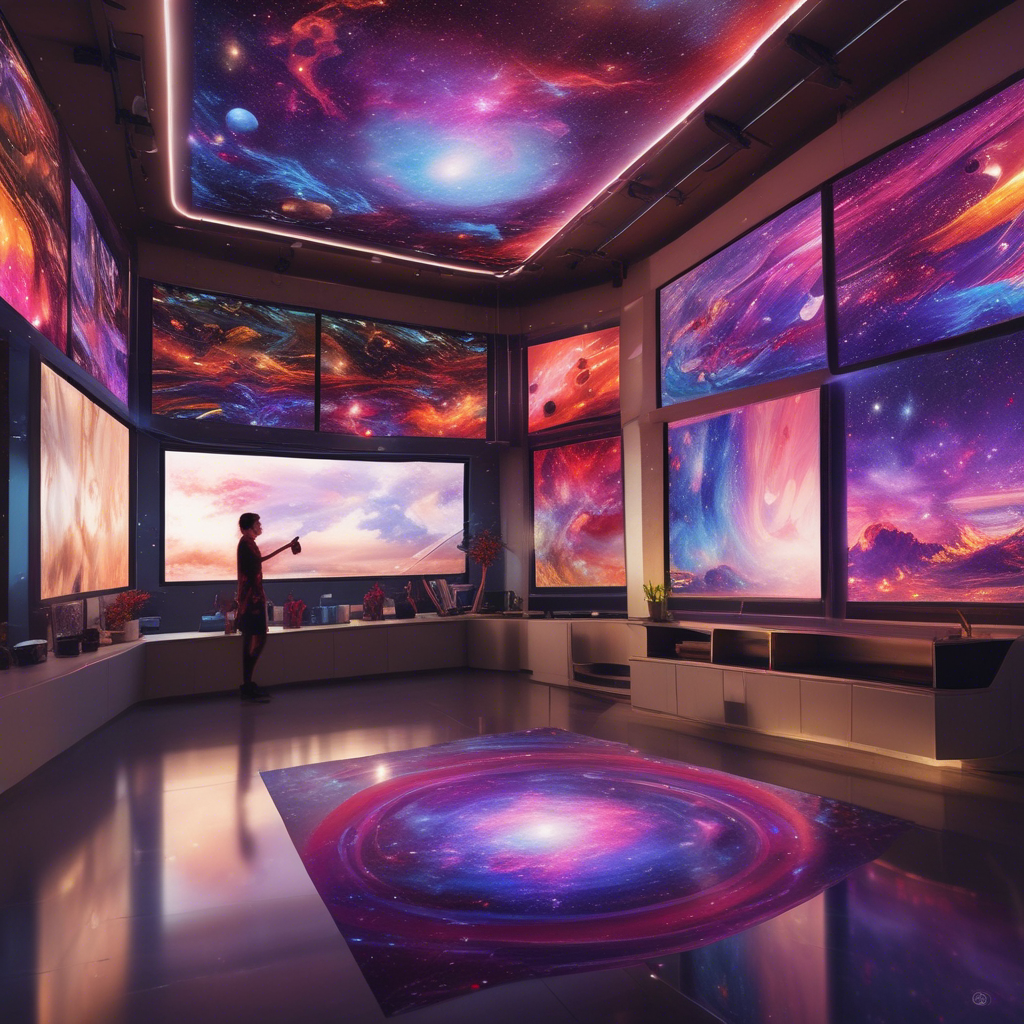

In [86]:
prompt = "A celestial digital studio, embodying the pinnacle of UI/UX design innovation, reminiscent of a futuristic artist's atelier. The studio is an ethereal space, suspended in a cosmic expanse, with floating holographic canvases displaying intricate, interactive user interfaces and mesmerizing user experiences. The walls are adorned with vibrant, flowing streams of color and light, symbolizing boundless creativity and innovation. Iconic design tools like Adobe XD, Figma, and Sketch appear as glowing, ethereal brushes, crafting masterpieces in real-time. Sleek, modern devices such as tablets, smartphones, and ultra-thin laptops are seamlessly integrated into the environment, showcasing stunning, intuitive app and web interfaces. Designers, portrayed as celestial artisans and digital sculptors, are seen meticulously crafting and refining their work with virtual brushes and tools, surrounded by an aura of inspiration and genius. The atmosphere exudes a sense of limitless creativity, thoughtfulness, and digital artistry, capturing the essence and future of cutting-edge UI/UX design, where every pixel is a brushstroke and every interaction a masterpiece."
seed = random.randint(0, sys.maxsize)

images = pipe(
    prompt = prompt,
    guidance_scale = 0.0,
    num_inference_steps = num_inference_steps,
    generator = torch.Generator("cuda").manual_seed(seed),
    ).images

print(f"Prompt:\t{prompt}\nSeed:\t{seed}")
media.show_images(images)
images[0].save("output.jpg")